In [179]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
from sklearn.compose import ColumnTransformer
import scipy.stats as stats
from matplotlib import pyplot as plt
from sklearn.preprocessing import FunctionTransformer
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import set_config
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier

In [7]:
df  = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv',index_col=False)
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

## Univariate Analysis using Panada Profiling

In [ ]:
profile = ProfileReport(df, title="Pandas Profiling Report")

In [ ]:
profile.to_file("Analysis_report.html")

In [3]:
num_cols_full=['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','YearsWithCurrManager','YearsSinceLastPromotion','YearsInCurrentRole']

In [8]:
## After analysis few colums are consts so droping them like [EmployeeCount,Over18,StandardHours], No Data missing
df.drop(['EmployeeCount','Over18','StandardHours','EmployeeNumber'],axis=1,inplace=True)
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0  Female  ...                  3                         1                 0   
1    Male  ...                  4                         4                 1   
2    Male  ...                  3                         2                 0   
3  Female  ...                  3                         3                 0   
4    Male  ...                  3                         4                 1   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                      0               1               6   
1                10                      3               3              10   
2                 7                      3               3               0   
3                 8                      3               3               8   
4                 6                      3               3               2   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0                   4                        0                    5  
1                   7                        1                    7  
2                   0                        0                    0  
3                   7                        3                    0  
4                   2                        2                    2  

[5 rows x 31 columns]

In [74]:
X,y = df.drop(['Attrition'],axis=1), np.where(df.Attrition=='No',1,0)
X.sample()

Age BusinessTravel  DailyRate              Department  DistanceFromHome  \
1023   56  Travel_Rarely       1255  Research & Development                 1   

      Education EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
1023          2  Life Sciences                        1  Female          90   

      ...  PerformanceRating  RelationshipSatisfaction StockOptionLevel  \
1023  ...                  4                         4                1   

      TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  \
1023                  5                     3                4   

      YearsAtCompany  YearsInCurrentRole YearsSinceLastPromotion  \
1023               3                   2                       1   

      YearsWithCurrManager  
1023                     0  

[1 rows x 30 columns]

## Validating the data for normal distribution for Numerical colums

In [10]:
num_cols=['DistanceFromHome','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','YearsWithCurrManager','YearsSinceLastPromotion','YearsInCurrentRole']
xn = X[num_cols]
xn.head()

DistanceFromHome  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
0                 1           5993                   8                 11   
1                 8           5130                   1                 23   
2                 2           2090                   6                 15   
3                 3           2909                   1                 11   
4                 2           3468                   9                 12   

   TotalWorkingYears  YearsWithCurrManager  YearsSinceLastPromotion  \
0                  8                     5                        0   
1                 10                     7                        1   
2                  7                     0                        0   
3                  8                     0                        3   
4                  6                     2                        2   

   YearsInCurrentRole  
0                   4  
1                   7  
2                   0  
3                   7  
4                   2

In [11]:
ft = FunctionTransformer(func=np.log1p)
xd = ft.fit_transform(xn)
xd = pd.DataFrame(xd,columns=num_cols)
xd.head()

DistanceFromHome  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
0          0.693147       8.698514            2.197225           2.484907   
1          2.197225       8.543056            0.693147           3.178054   
2          1.098612       7.645398            1.945910           2.772589   
3          1.386294       7.975908            0.693147           2.484907   
4          1.098612       8.151622            2.302585           2.564949   

   TotalWorkingYears  YearsWithCurrManager  YearsSinceLastPromotion  \
0           2.197225              1.791759                 0.000000   
1           2.397895              2.079442                 0.693147   
2           2.079442              0.000000                 0.000000   
3           2.197225              0.000000                 1.386294   
4           1.945910              1.098612                 1.098612   

   YearsInCurrentRole  
0            1.609438  
1            2.079442  
2            0.000000  
3            2.079442  
4            1.098612

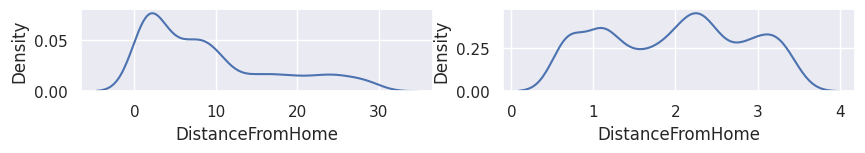

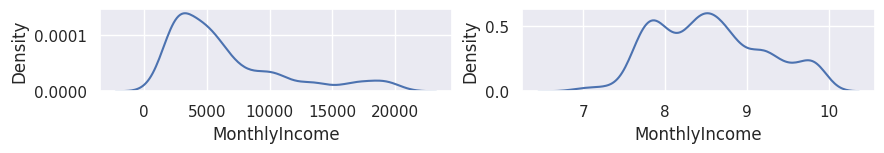

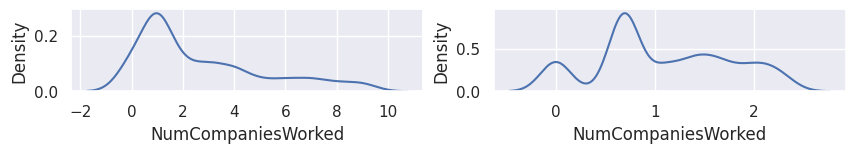

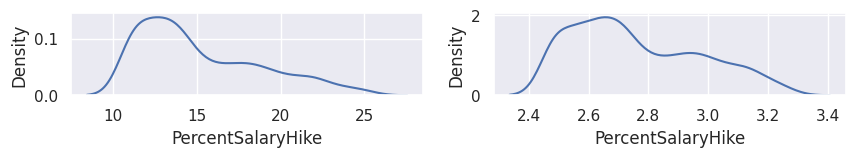

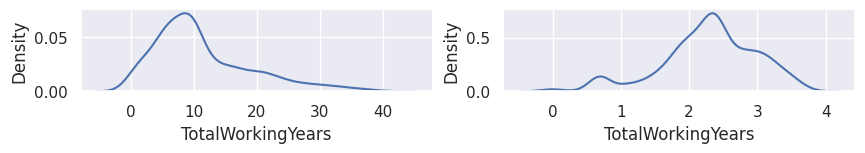

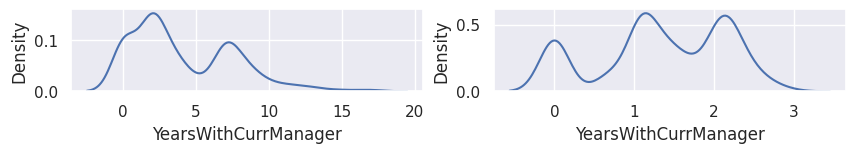

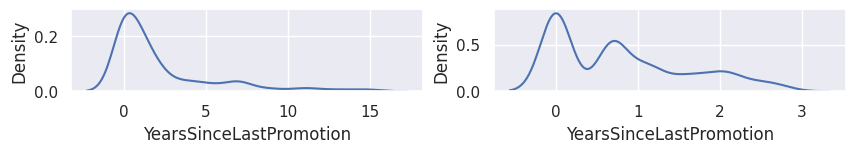

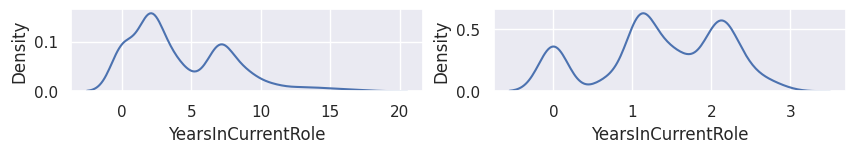

In [27]:
## plotting Dist plot before and after
sns.set(rc={"figure.figsize": (10, 10)})
count=1
for i in num_cols:
    plt.subplot(len(num_cols),2,count)
    ax = sns.kdeplot(xn[i])
    plt.subplot(len(num_cols),2,count+1)
    ax = sns.kdeplot(xd[i])
    plt.show()
    count = count +2

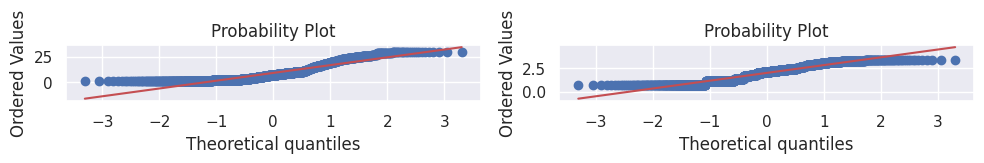

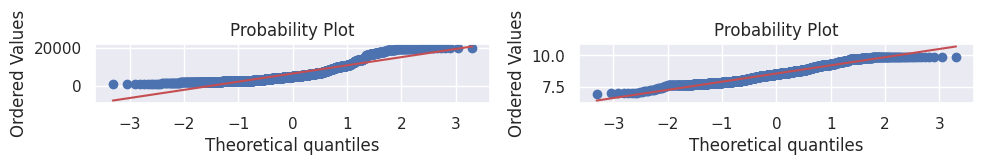

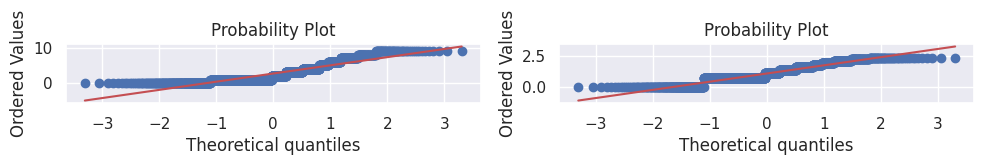

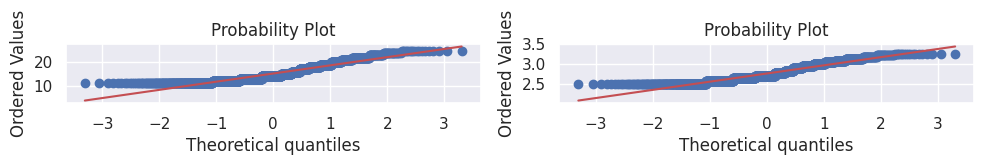

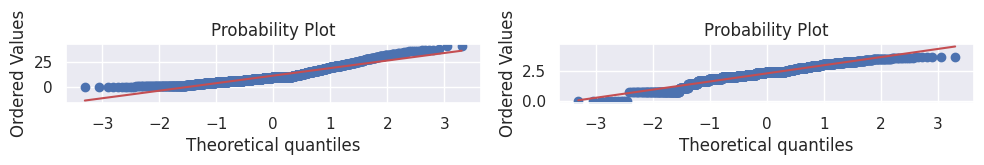

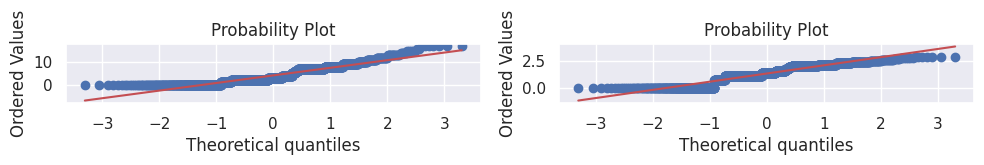

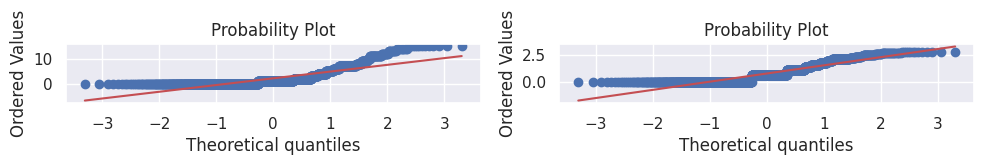

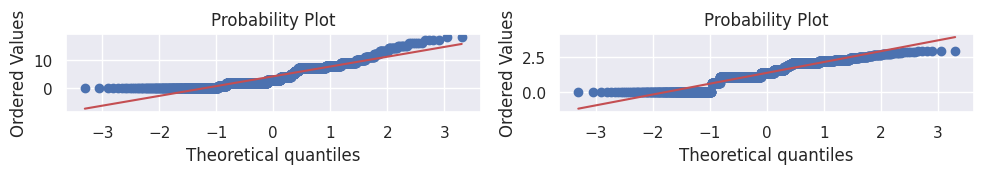

In [33]:
## plotting QQ plot before and after
sns.set(rc={"figure.figsize": (10, 10)})
count=1
for i in num_cols:
    plt.subplot(len(num_cols),2,count)
    ax = stats.probplot(xn[i],dist='norm',plot=plt)
    plt.subplot(len(num_cols),2,count+1)
    ax = stats.probplot(xd[i],dist='norm',plot=plt)
    plt.tight_layout()
    plt.show()
    count = count +2

### Clearly from above analysis we can see that after  applying log1p transformation to num_cols the right skewness is removed from the data 

## outlier detection from numerical cols

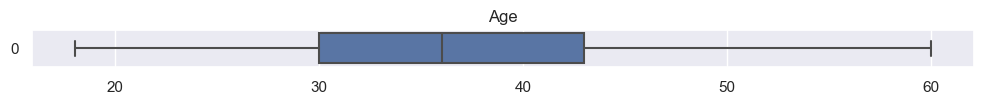

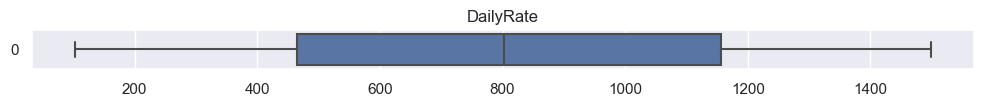

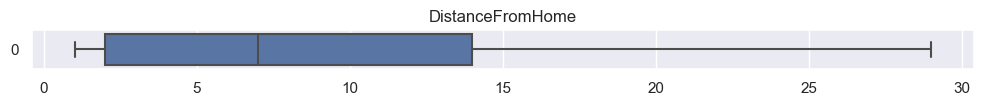

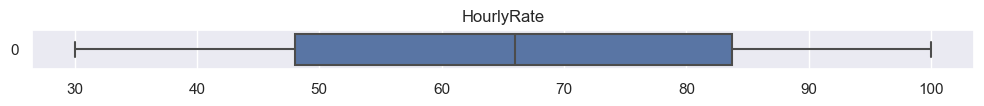

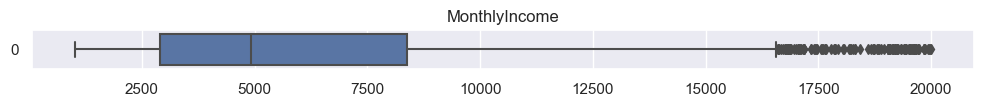

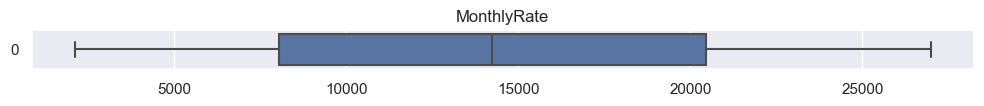

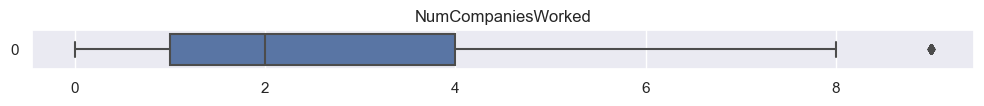

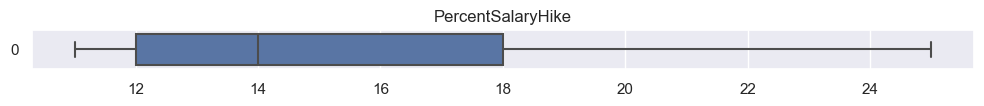

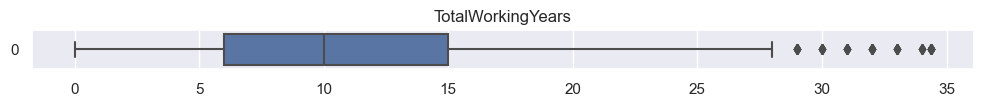

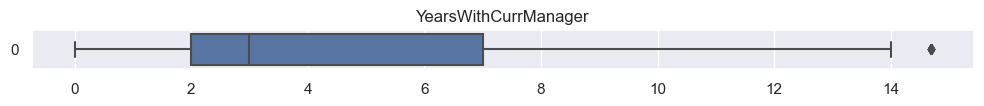

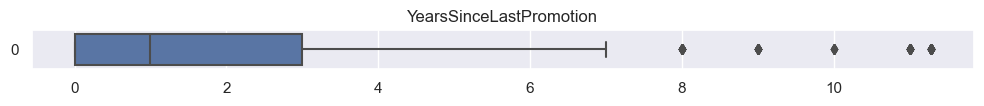

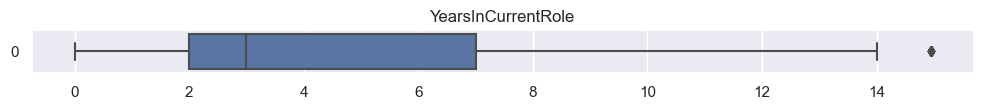

In [117]:
count=1
sns.set(rc={"figure.figsize": (10, 10)})
for i in num_cols_full:
    plt.subplot(len(num_cols_full),1,count)
    sns.boxplot(X[i],orient='h')
    plt.title(i)
    plt.tight_layout()
    plt.show()
    count = count +1

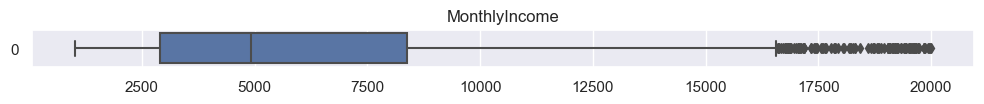

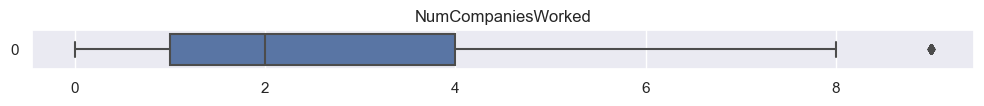

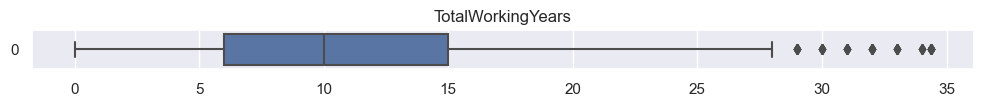

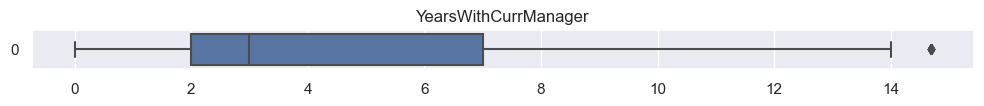

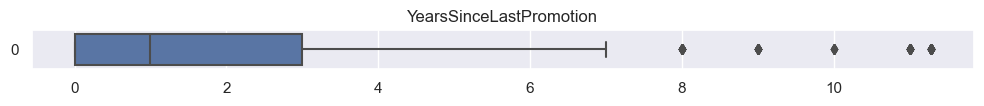

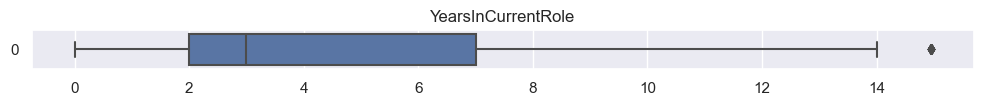

In [118]:
out_col = ['MonthlyIncome','NumCompaniesWorked','TotalWorkingYears','YearsWithCurrManager', 'YearsSinceLastPromotion','YearsInCurrentRole']
count=1
sns.set(rc={"figure.figsize": (10, 10)})
for i in out_col:
    plt.subplot(len(num_cols_full),1,count)
    sns.boxplot(X[i],orient='h')
    plt.title(i)
    plt.tight_layout()
    plt.show()
    count = count +1

## Coulumns with outlier are [MonthlyIncome,NumCompaniesWorked,TotalWorkingYear,YearWithCurrManager, YearSinceLastPromotion,YearinCurrentRole]

In [128]:
for i in out_col:
    up = X[i].mean()+3*X[i].std()
    dw = X[i].mean()-3*X[i].std()
    # print(up,dw)
    z=X[i]
    # X[i] = X[i].map(lambda x : x if  x< up and x>dw else up if x> up else dw )
    X[i]= np.where(X[i] > up,
                   up,
                   np.where(X[i] < dw,
                            dw,
                            X[i]
                           )
                  )
    # print(z-X[i])

In [12]:
## Univarite Categorical Analysis
cat_col_full = []
for i in X.columns:
    if(X[i].dtypes in ['object']):
        cat_col_full.append(i)
cat_col_full

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

# Multivariate analysis

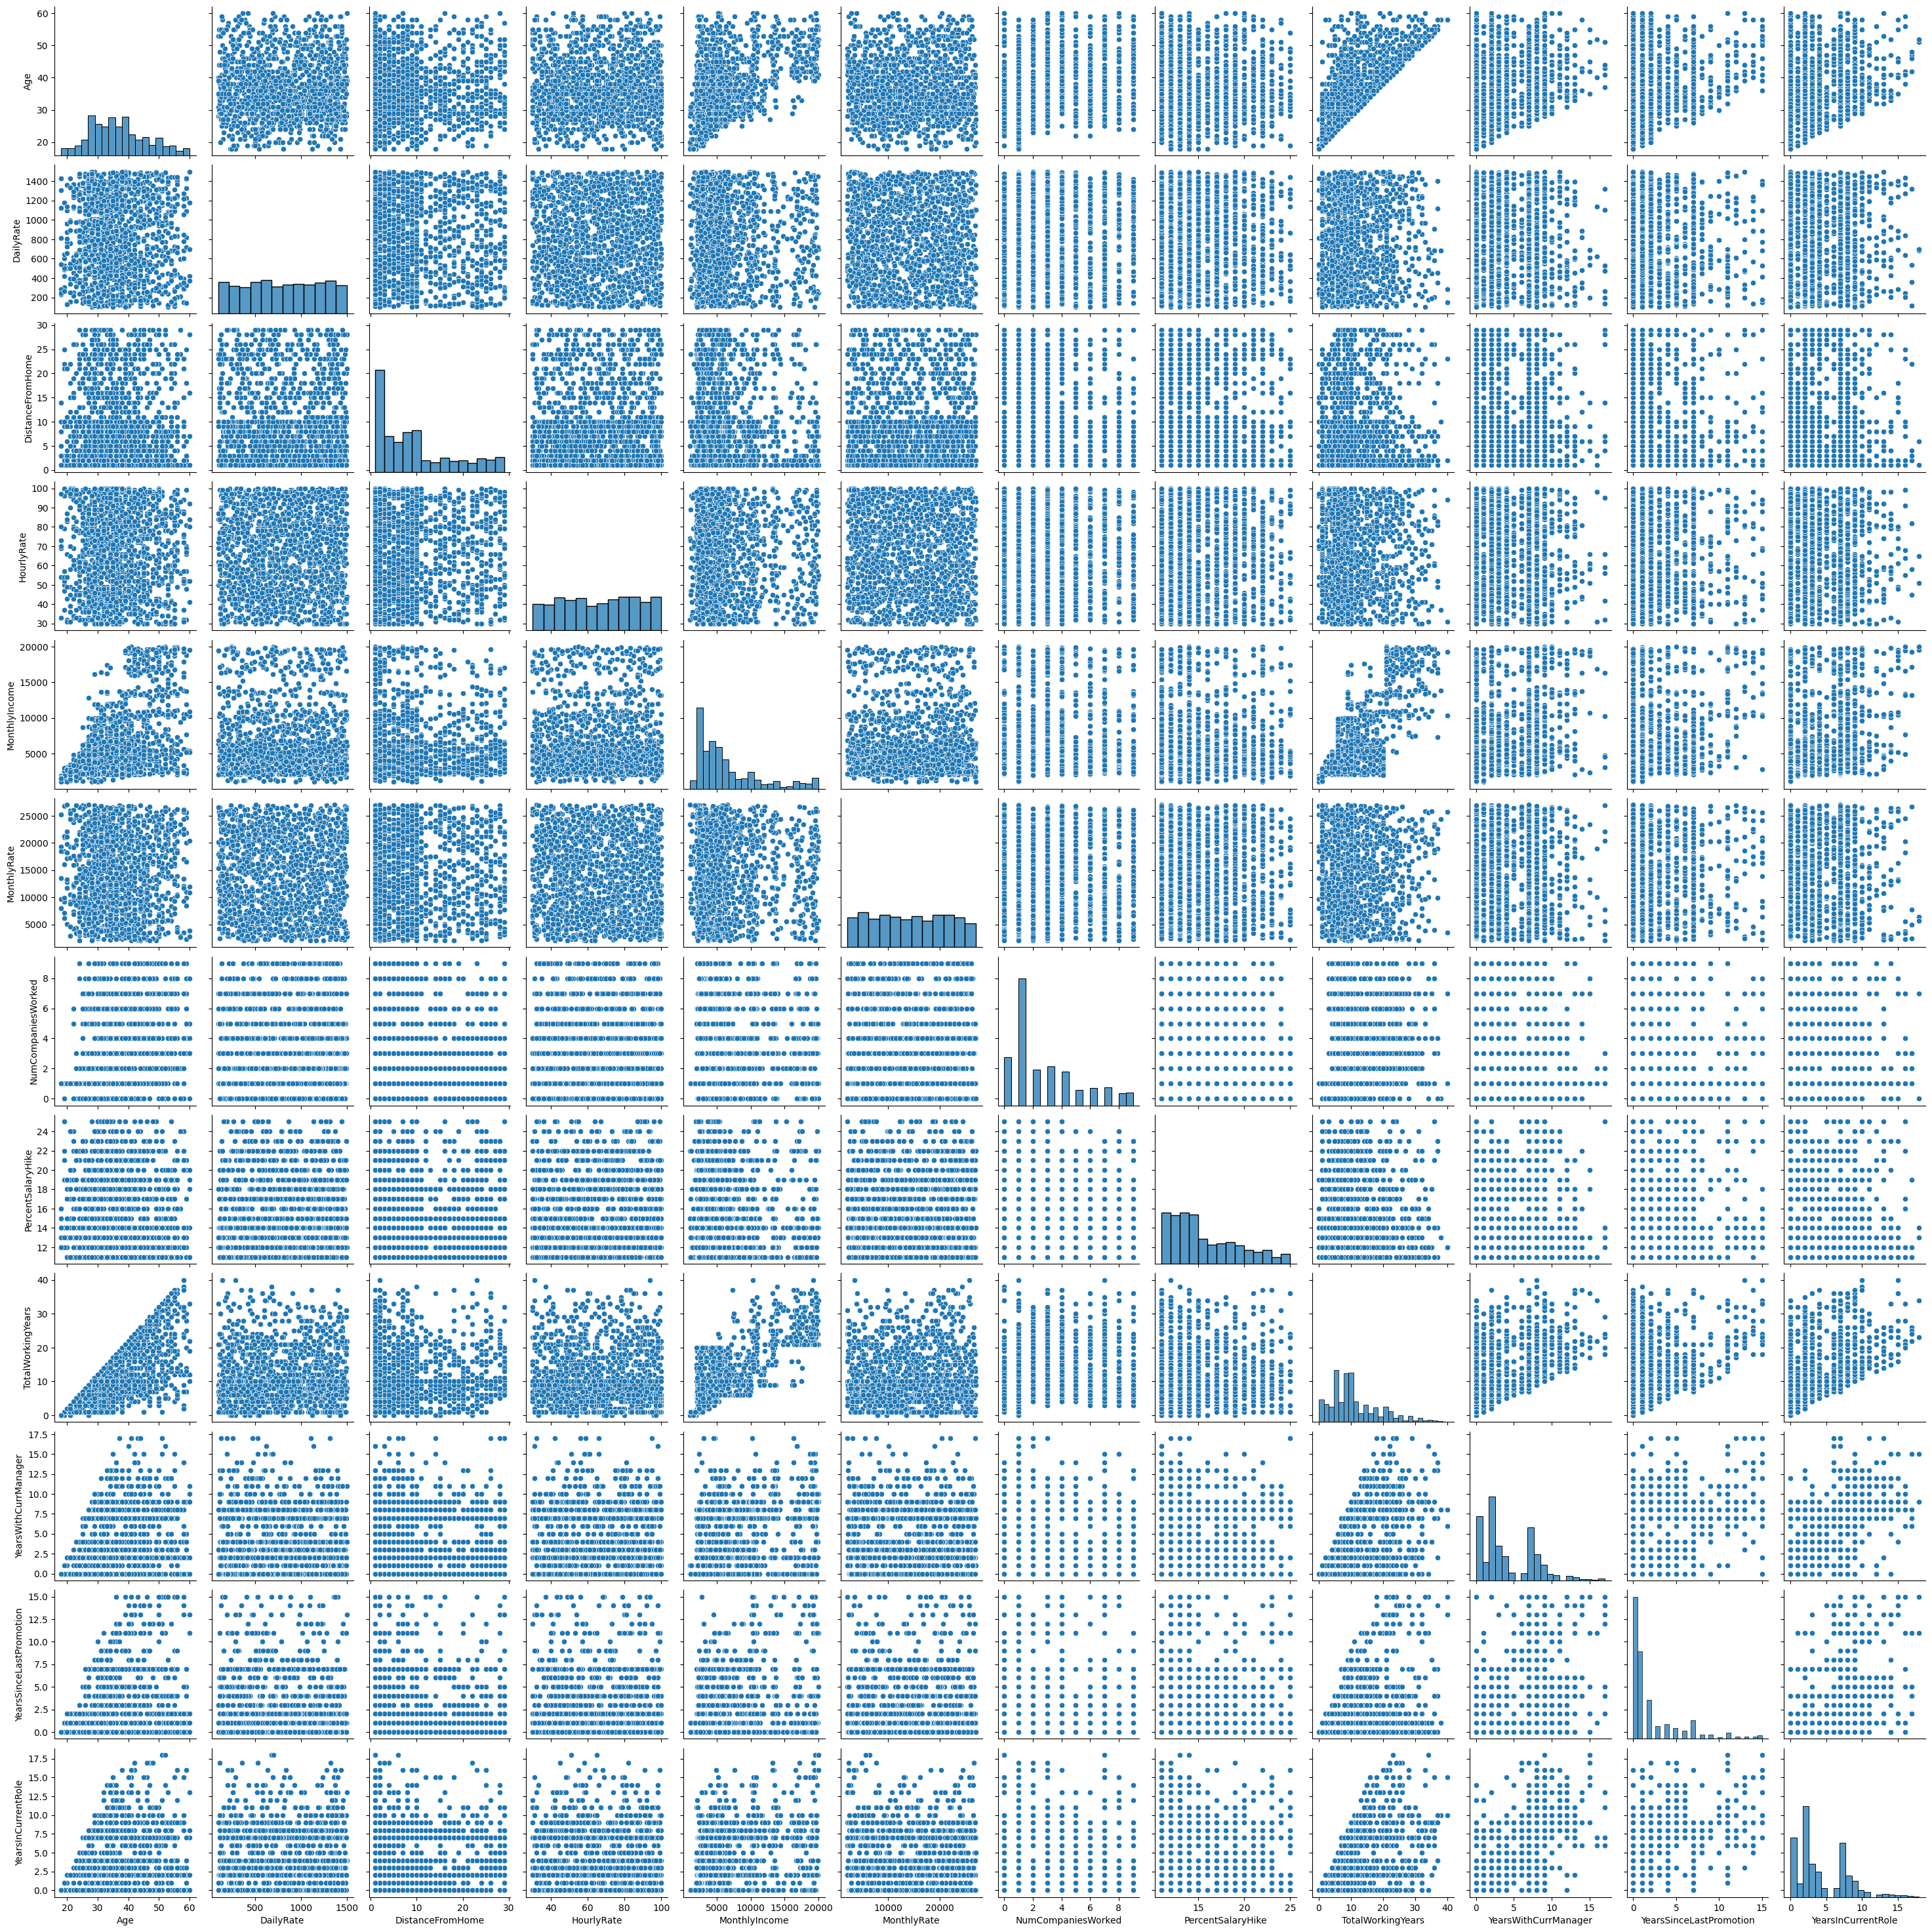

In [19]:
sns.pairplot(df[num_cols_full])
plt.show()

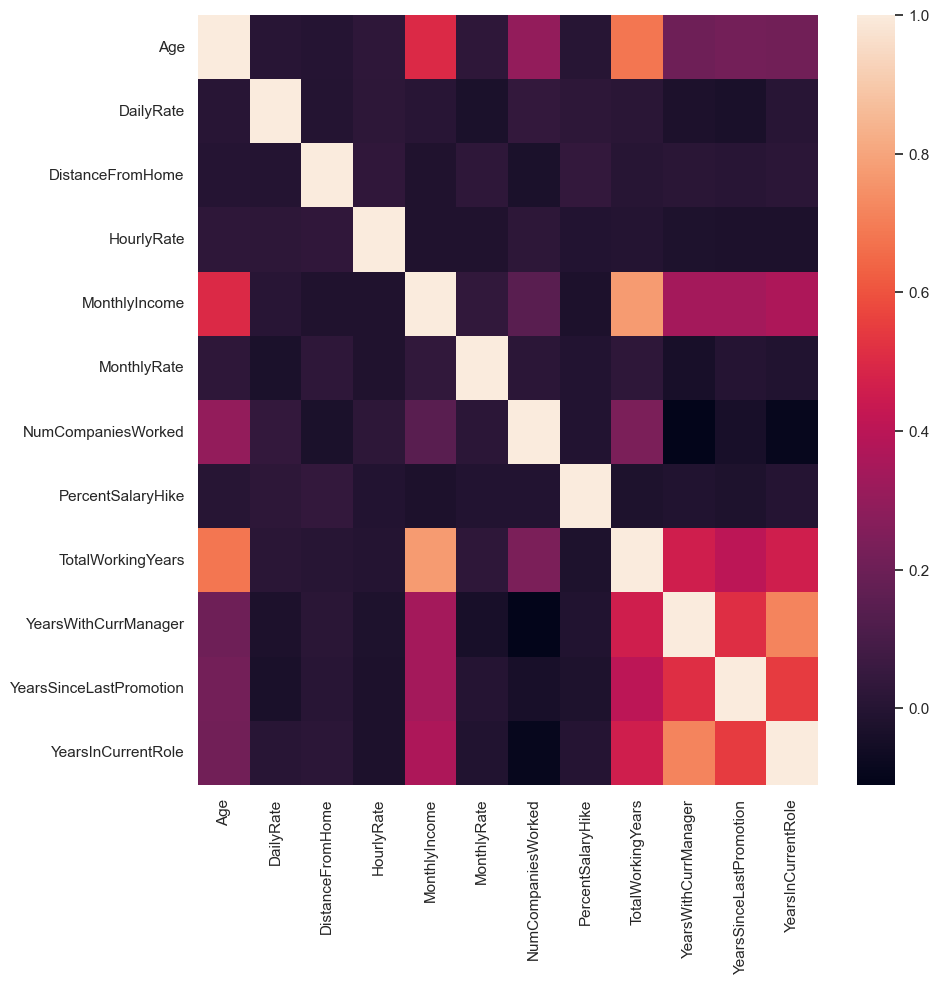

In [28]:
sns.set(rc={"figure.figsize": (10, 10)})
sns.heatmap(X[num_cols_full].corr())
plt.show()

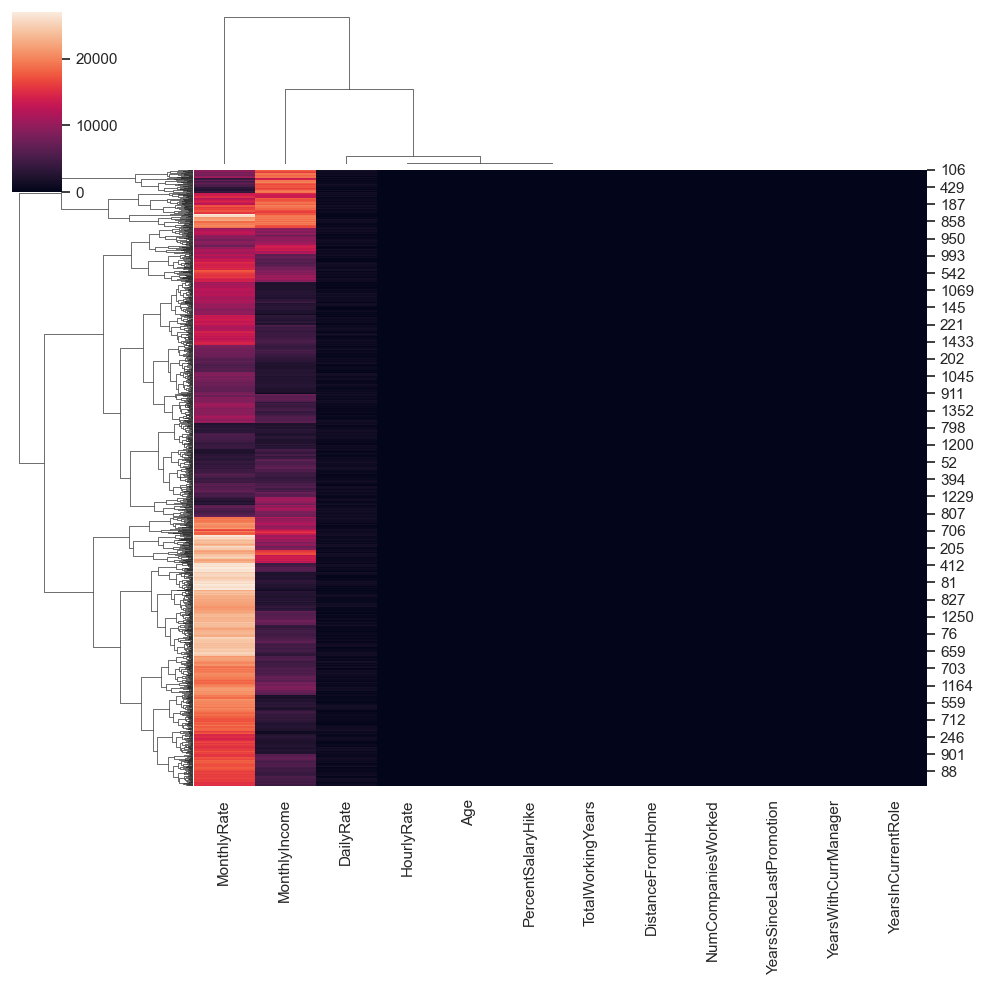

In [36]:
sns.clustermap(X[num_cols_full])
plt.show()

In [130]:
transformX = ColumnTransformer(transformers=[('OneHot Encoder', OneHotEncoder(sparse=False,drop='first'),cat_col_full),
                                           ('Log Tranform',FunctionTransformer(func=np.log1p),num_cols),
                                           ('Stander Scaler',StandardScaler(),num_cols_full )],remainder='passthrough')

In [131]:
XNew = transformX.fit_transform(X)

In [132]:
XNew.shape[1]

52

In [139]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

In [153]:
modelLogistic = LogisticRegression(random_state=0,solver='liblinear')

In [154]:
pipe = Pipeline([('transform',transformX),('LogisticReg',modelLogistic)])

In [155]:
set_config(display='diagram')
pipe

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHot Encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'Gender',
                                                   'JobRole', 'MaritalStatus',
                                                   'OverTime']),
                                                 ('Log Tranform',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  ['DistanceFromHome',
                                                   'MonthlyIncome',
                                                   'NumCompaniesWorked...
                                                   'YearsSinceLastPromotion',
                                                   'YearsInCurrentRole']),
                                                 ('Stander Scaler',
                                                  StandardScaler(),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome',
                                                   'HourlyRate',
                                                   'MonthlyIncome',
                                                   'MonthlyRate',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike',
                                                   'TotalWorkingYears',
                                                   'YearsWithCurrManager',
                                                   'YearsSinceLastPromotion',
                                                   'YearsInCurrentRole'])])),
                ('LogisticReg',
                 LogisticRegression(random_state=0, solver='liblinear'))])

In [173]:
def predictDifferentModel(transformX,model,X_train,y_train, X_test,y_test):
    p=Pipeline([('transform',transformX),('Arg Model',model)])
    p.fit(X_train,y_train)
    yd= p.predict(X_test)
    return(f1_score(y_test, yd),accuracy_score(y_test, yd))

In [174]:
predictDifferentModel(transformX,modelLogistic,X_train,y_train, X_test,y_test)

(0.936902485659656, 0.8877551020408163)

In [175]:
predictDifferentModel(transformX,tree.DecisionTreeClassifier(),X_train,y_train, X_test,y_test)

(0.8779527559055118, 0.7891156462585034)

In [178]:
 predictDifferentModel(transformX,SVC(kernel='linear', random_state=0),X_train,y_train, X_test,y_test)

(0.9431818181818181, 0.8979591836734694)

In [185]:
 predictDifferentModel(transformX,RandomForestClassifier(n_estimators=300, max_features=53,max_depth=200, random_state=0),X_train,y_train, X_test,y_test)

(0.9256505576208177, 0.8639455782312925)